## Predicting Product Pricing


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
df=pd.read_csv("retail_price.csv")

In [24]:
df_copy=df.copy()

In [25]:
df.isnull().sum()




product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [26]:
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## changing date format

In [27]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['year'] = df['month_year'].dt.year
df['month'] = df['month_year'].dt.month

In [28]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [29]:
df.info


<bound method DataFrame.info of     product_id product_category_name month_year  qty  total_price  \
0         bed1        bed_bath_table 2017-01-05    1        45.95   
1         bed1        bed_bath_table 2017-01-06    3       137.85   
2         bed1        bed_bath_table 2017-01-07    6       275.70   
3         bed1        bed_bath_table 2017-01-08    4       183.80   
4         bed1        bed_bath_table 2017-01-09    2        91.90   
..         ...                   ...        ...  ...          ...   
671       bed5        bed_bath_table 2017-01-05    1       215.00   
672       bed5        bed_bath_table 2017-01-06   10      2090.00   
673       bed5        bed_bath_table 2017-01-07   59     12095.00   
674       bed5        bed_bath_table 2017-01-08   52     10375.00   
675       bed5        bed_bath_table 2017-01-09   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000   45.950000                   39   
1        12.933333   45.95000

In [30]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [31]:
# Rename the column
df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
df.rename(columns={"product_description_lenght": "product_description_length"}, inplace=True)

In [32]:
df.drop(columns=['s'])

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_length,product_description_length,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,2017-01-05,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,2017-01-06,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,2017-01-07,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,2017-01-08,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [33]:
df.describe()


,month_year,qty,total_price,freight_price,unit_price,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_score,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2017-07-16 20:54:40.473372928,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
min,2017-01-01 00:00:00,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,2017-01-09 00:00:00,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,2018-01-01 00:00:00,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,2018-01-04 00:00:00,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,2018-01-08 00:00:00,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000
std,NaN,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657


In [34]:
df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_length            24
product_description_length     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                           1
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

data cleaning is done now we visuallise them


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9812\1487795105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='product_id', y='unit_price', palette='Set2')


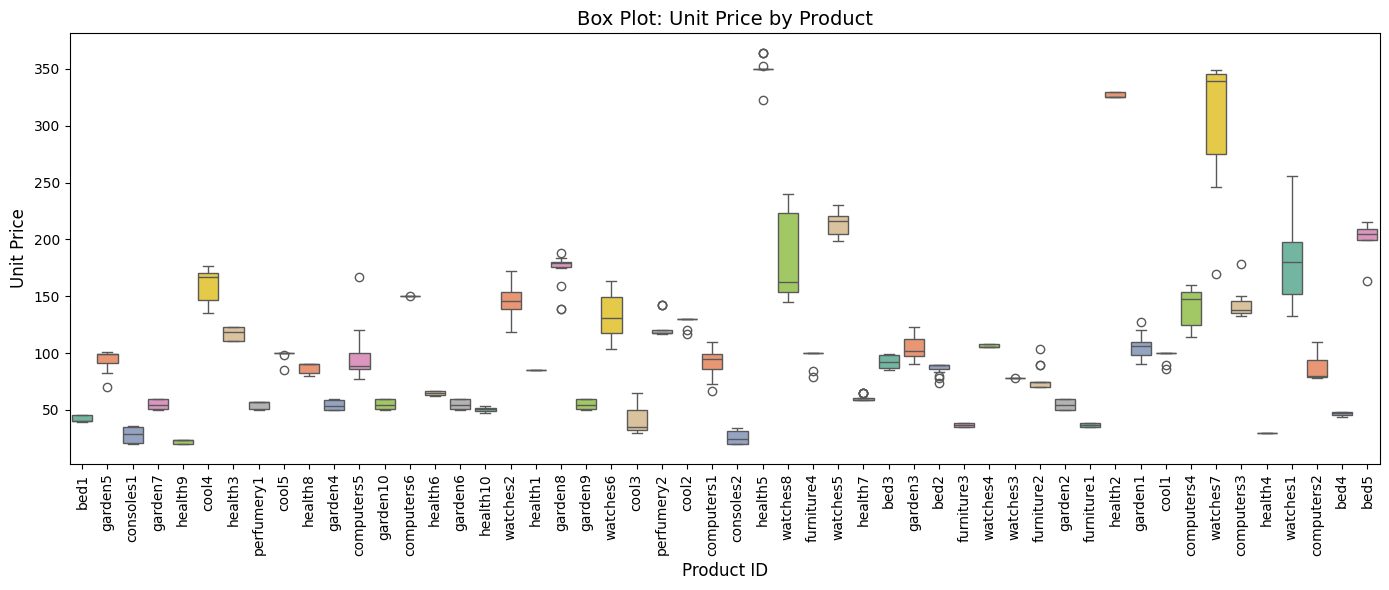

In [35]:
# Create a box plot for unit_price grouped by product to find outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='product_id', y='unit_price', palette='Set2')
plt.title('Box Plot: Unit Price by Product', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [36]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for unit_price
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
df['unit_price_capped'] = df['unit_price'].clip(lower=lower_bound, upper=upper_bound)

# Display the capped data
df[['product_id', 'unit_price', 'unit_price_capped']].head()

,product_id,unit_price,unit_price_capped
0,bed1,45.95,45.95
1,bed1,45.95,45.95
2,bed1,45.95,45.95
3,bed1,45.95,45.95
4,bed1,45.95,45.95


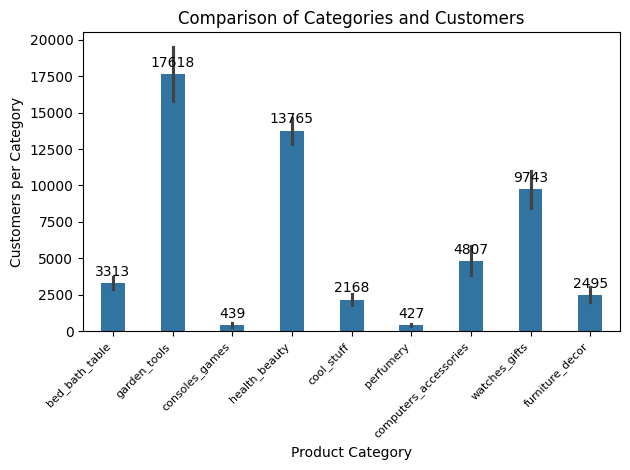

In [37]:
# Create the bar plot
ax = sns.barplot(x='product_category_name', y='customers', data=df, estimator=sum, width=0.4)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Comparison of Categories and Customers')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('Customers per Category')

# Show plot
plt.tight_layout()
plt.show()

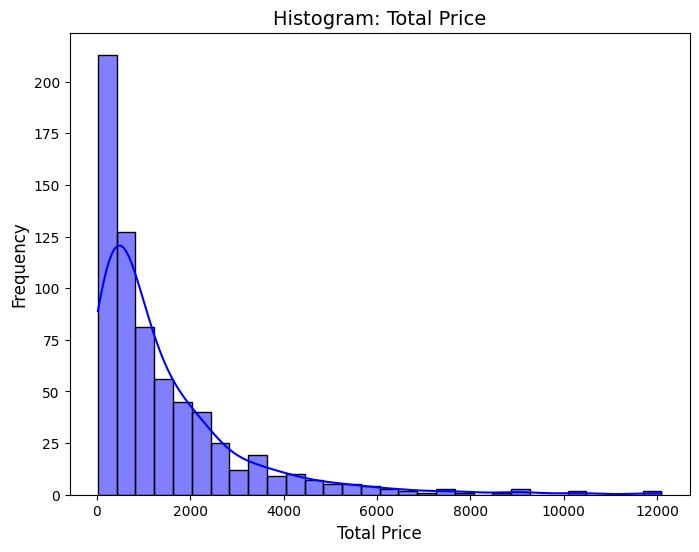

In [38]:
# Histogram for total_price
plt.figure(figsize=(8, 6))
sns.histplot(df['total_price'], kde=True, color='blue', bins=30)
plt.title('Histogram: Total Price', fontsize=14)
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


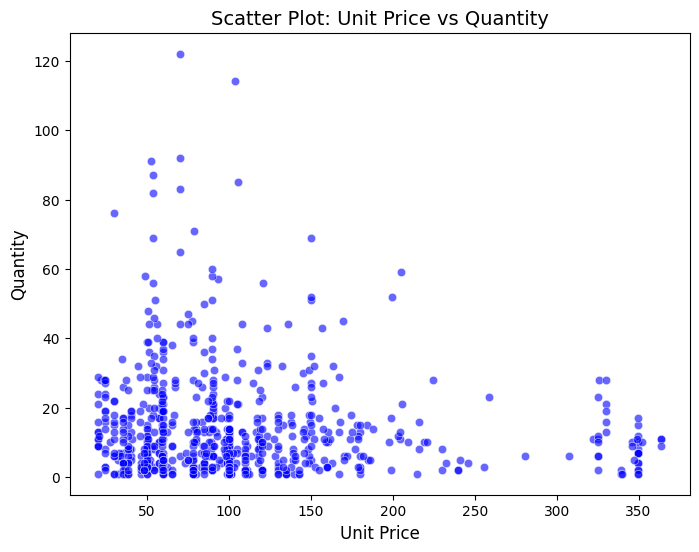

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='unit_price', y='qty', color='blue', alpha=0.6)
plt.title('Scatter Plot: Unit Price vs Quantity', fontsize=14)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()


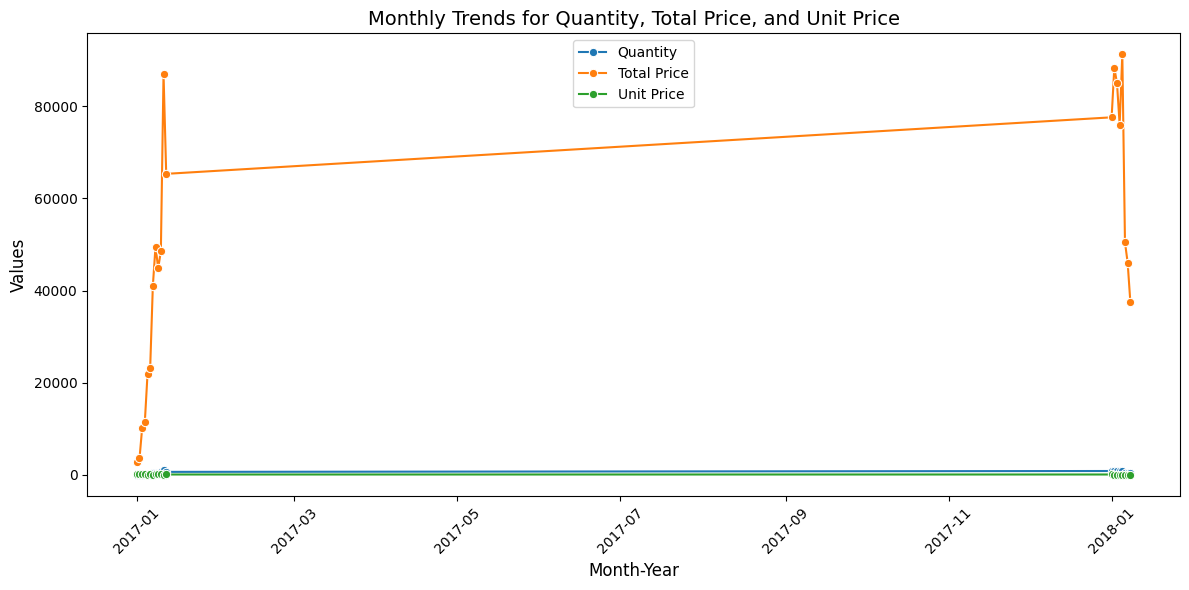

In [40]:


# Line plot for monthly trends (qty, total_price, unit_price)

df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
monthly_trends = df.groupby('month_year').agg({'qty': 'sum', 
                                               'total_price': 'sum', 
                                               'unit_price': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='month_year', y='qty', label='Quantity', marker='o')
sns.lineplot(data=monthly_trends, x='month_year', y='total_price', label='Total Price', marker='o')
sns.lineplot(data=monthly_trends, x='month_year', y='unit_price', label='Unit Price', marker='o')
plt.title('Monthly Trends for Quantity, Total Price, and Unit Price', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


## Time-Series Analysis: Trends in unit_price

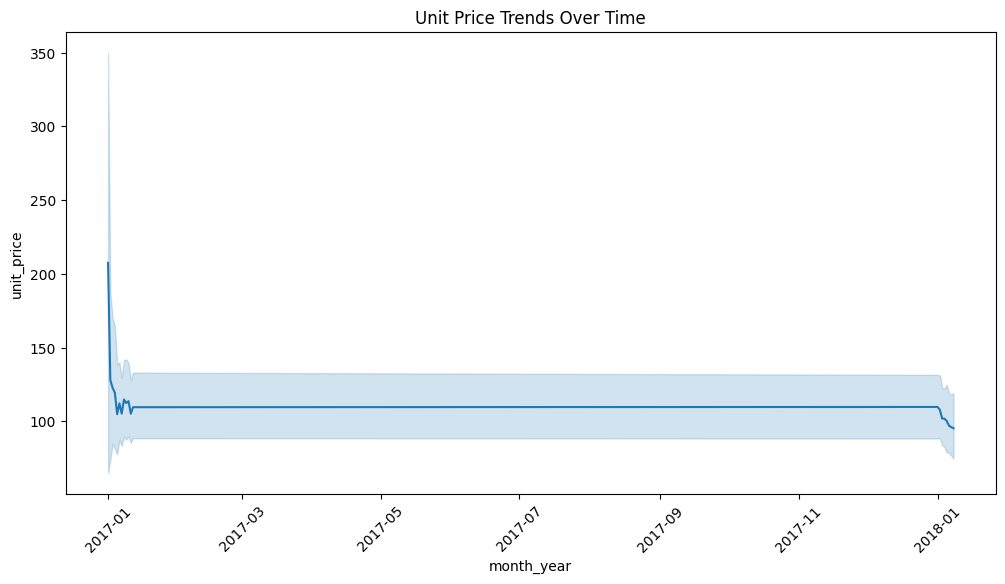

In [41]:

df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

plt.figure(figsize=(12,6))
sns.lineplot(x='month_year', y='unit_price', data=df)
plt.xticks(rotation=45)
plt.title("Unit Price Trends Over Time")
plt.show()

## Price vs. Demand Analysis

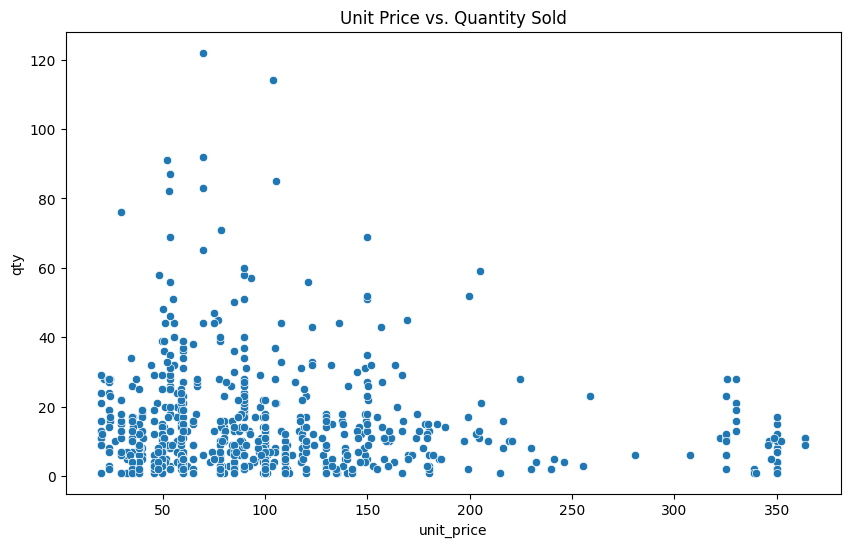

In [42]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='unit_price', y='qty', data=df)
plt.title("Unit Price vs. Quantity Sold")
plt.show()


## Price vs. Competitor Prices

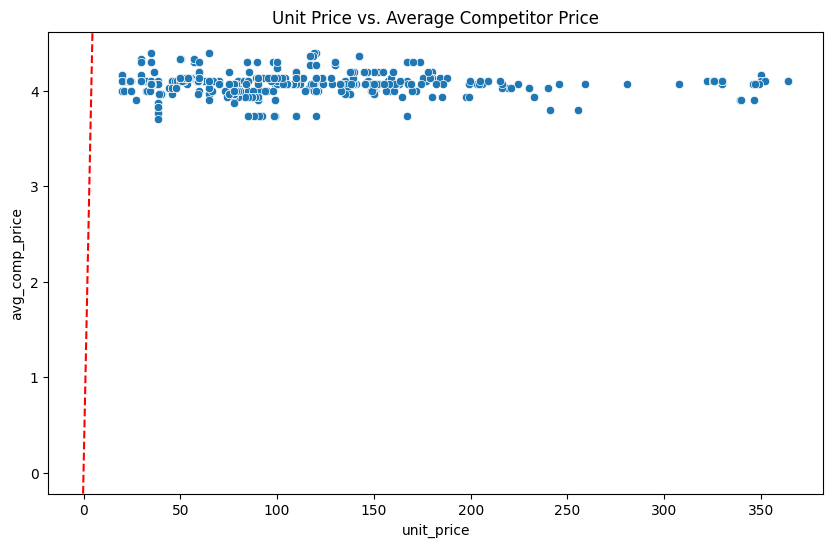

In [43]:

competitor_prices = ['ps1', 'ps2', 'ps3']
df['avg_comp_price'] = df[competitor_prices].mean(axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(x='unit_price', y='avg_comp_price', data=df)
plt.axline((0,0), slope=1, color="red", linestyle="--")
plt.title("Unit Price vs. Average Competitor Price")
plt.show()


## Discount Analysis

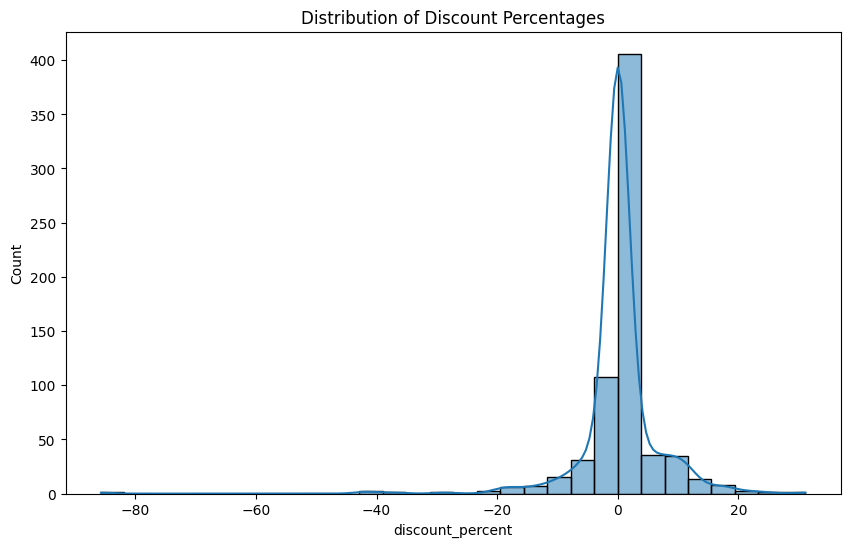

In [44]:

df['discount'] = df['lag_price'] - df['unit_price']
df['discount_percent'] = (df['discount'] / df['lag_price']) * 100

plt.figure(figsize=(10,6))
sns.histplot(df['discount_percent'], bins=30, kde=True)
plt.title("Distribution of Discount Percentages")
plt.show()


## Customer Segmentation

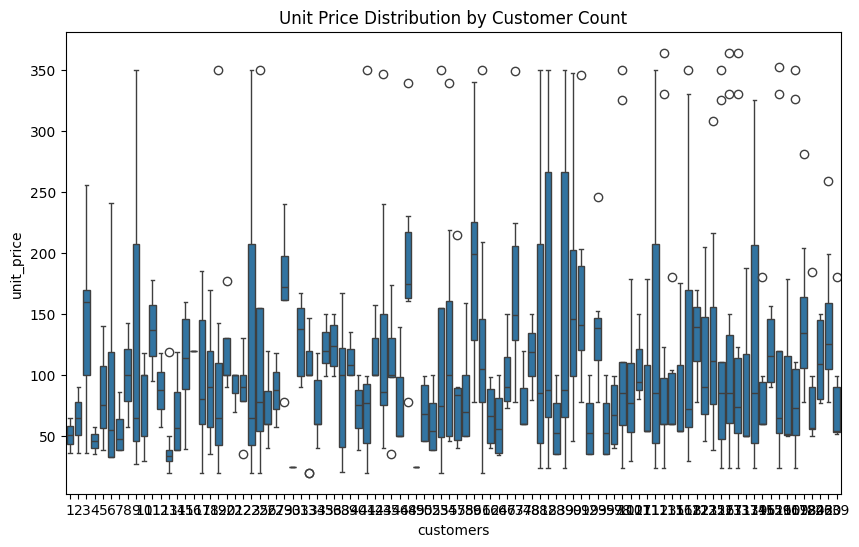

In [45]:

plt.figure(figsize=(10,6))
sns.boxplot(x='customers', y='unit_price', data=df)
plt.title("Unit Price Distribution by Customer Count")
plt.show()


## Freight & Logistic Cost Analysis

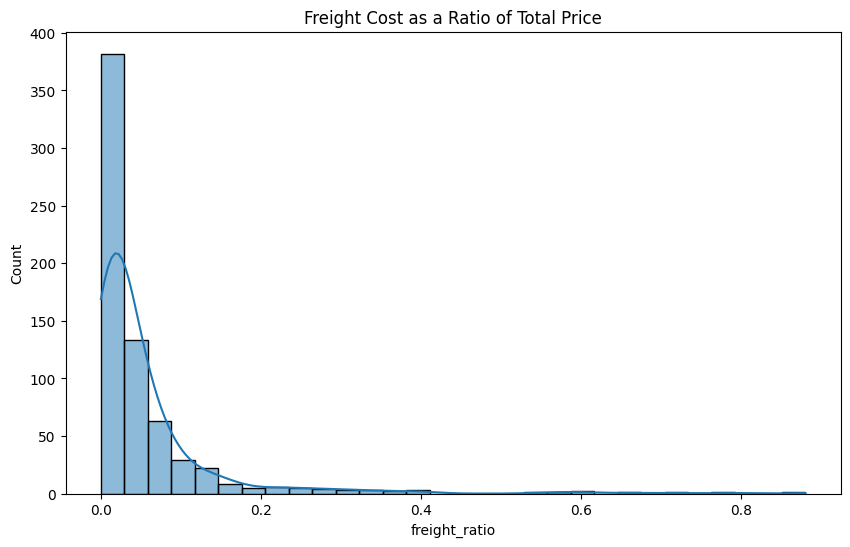

In [46]:

df['freight_ratio'] = df['freight_price'] / df['total_price']

plt.figure(figsize=(10,6))
sns.histplot(df['freight_ratio'], bins=30, kde=True)
plt.title("Freight Cost as a Ratio of Total Price")
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
X = df[['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']]
y = df['total_price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.1779716297697205e-22
R-squared: 1.0


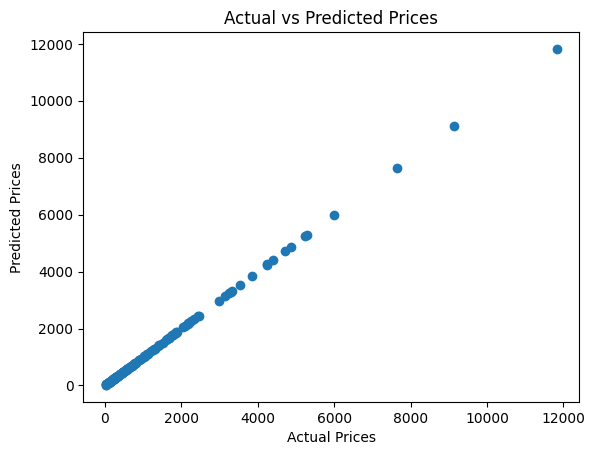

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()